In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading and Preprocessing

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')

customer_profile = customer_transactions.groupby('CustomerID').agg({
    'TransactionID': 'count', 
    'TotalValue': 'sum',   
    'Quantity': 'sum',         
}).reset_index()

customer_profile = pd.merge(customer_profile, customers[['CustomerID', 'Region']], on='CustomerID', how='left')
customer_profile = customer_profile.dropna()
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile.drop(['CustomerID'], axis=1))


## K-Means Clustering

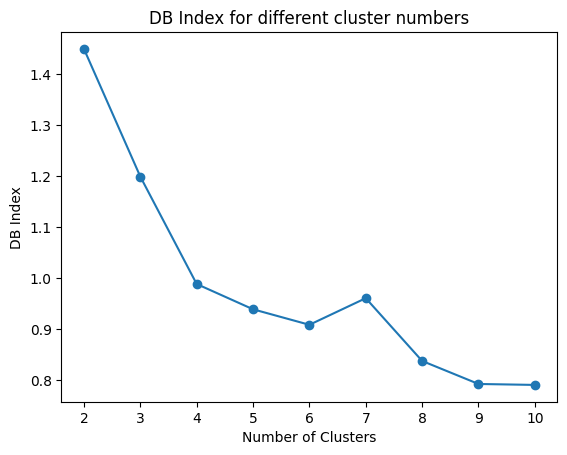

Optimal number of clusters: 10


In [3]:
range_n_clusters = range(2, 11)
db_index_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, clusters)
    db_index_scores.append(db_index)

plt.plot(range_n_clusters, db_index_scores, marker='o')
plt.title('DB Index for different cluster numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

optimal_n_clusters = range_n_clusters[np.argmin(db_index_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')


## Visualizing Clusters

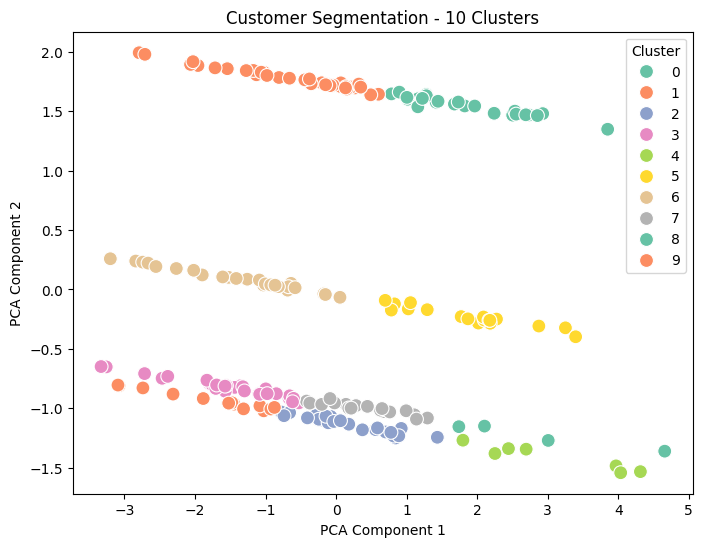

In [4]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_data)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_profile['Cluster'], palette='Set2', s=100)
plt.title(f'Customer Segmentation - {optimal_n_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


## Report and Metrics

In [5]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, customer_profile['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Optimal DB Index: {min(db_index_scores)}')


Silhouette Score: 0.43763143402231275
Optimal DB Index: 0.79002838575684
